Xây dựng lại bài toán t-SNE. Tính đạo hàm loss với các parameter (y) trong bài toán t-SNE


The similarity of data point $x_j$ to data point $x_i$ is the conditional probability, $~p_{(j|i)}$. \newline
For nearby data points, $p_{(j|i)}$ is relatively high, whereas for widely separated data points, $p_{(j|i)}$ will be almost infinitesimal \newline
The conditional probability $p_{(j|i)}$ is given by: 
$$p_{(j|i)} = \frac{e^{-\left \| x_i - x_j \right \|^2/ 2 \sigma_i^2}}{\sum_{k\neq i} e^{-\left \| x_i - x_k \right \|^2/ 2 \sigma_i^2}}$$
where $\sigma_i$ is the variance of the Gaussian that is centered on data point $x_i$
For the low-dimensional counterparts $y_i$ and $y_j$ of the high-dimensional data points $x_i$ and $x_j$, it is possible to compute a similar conditional probability, which we denote by $q_{(j|i)}$:
$$q_{(j|i)} = \frac{e^{-\left \| y_i - y_j \right \|^2}}{\sum_{k\neq i}e^{-\left \| y_i - y_k \right \|^2}}$$
Since we are only interested in modeling pairwise similarities, we set $q_{(i|i)} = 0$. \newline
If the map points $y_i$ and $y_j$ correctly model the similarity between the high-dimensional data points $x_i$ and $x_j$, the conditional probabilities $p_{j|i}$ and $q_{j|i}$ will be equal \newline
SNE minimizes the sum of Kullback-Leibler divergences over all data points using a gradient descent method. The cost function C is given: \newline
$$C = \sum_{i} KL(P_i||Q_i) = \sum_{i} \sum_{j} p_{(j|i)} log \frac{p_{j|i}}{q_{j|i}}$$
in which $P_i$ represents the conditional probability distribution over all other data points given data point $x_i$, and $Q_i$ represents the conditional probability distribution over all other map points given map point $y_i$ \newline

Because the Kullback-Leibler divergence is not symmetric, different types of error
in the pairwise distances in the low-dimensional map are not weighted equal \newline

SNE performs a binary search for the value of $\sigma_i$ that produces a $P_i$ with a fixed perplexity that is specified by the user. The perplexity is defined as: 
$$Perp(P_i) = 2^{H(P_i)}$$
where $H(P_i)$ is the Shannon entropy of $P_i$ measured in bits
$$H(P_i) = -\sum_{j} p_{(j|i)} log_{2}p_{(j|i)}$$
The perplexity can be interpreted as a smooth measure of the effective number of neighbors. The performance of SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50. \newline
The minimization of the cost function is performed using a gradient descent method. The gradient has a surprisingly simple form: 
$$\frac{\delta C}{\delta y_i} = 2 \sum_{j} (p_{j|i} - q_{j|i} + p_{i|j} - q_{i|j})(y_i - y_j) $$
Mathematically, the gradient update with a momentum term is given by:
$$\gamma^{(t)} = \gamma^{(t-1)} + \eta \frac{\delta C}{\delta y} + \alpha (t)(\gamma^{(t-1)} - \gamma^{(t-2)}) $$
where $\gamma^{(t)}$ indicates the solution at iteration t, $\eta$ indicates the learning rate, and $\alpha(t)$ represents the momentum at iteration t. \newline

As an alternative to minimizing the sum of the Kullback-Leibler divergences between the conditional probabilities $p_{j|i}$ and $q_{j|i}$ it is also possible to minimize a single Kullback-Leibler divergence between a joint probability distribution, P, in the high-dimensional space and a joint probability distribution, Q, in the low-dimensional space:
$$C = \sum_{i} KL(P||Q) = \sum_{i} \sum_{j} p_{(j|i)} log \frac{p_{ij}}{q_{ij}}$$
Set $p_{ii}$ and $q_{ii}$ to zero. We refer to this type of SNE as symmetric SNE, because it
has the property that $p_{ij}= p_{ji}$ and $q_{ij}= q_{ji} \forall i,j$ \newline
In symmetric SNE, the pairwise similarities in the low-dimensional map $q_{ij}$ are given by:
$$q_{ij} = \frac{e^{-\left \| y_i - y_j \right \|^2}}{\sum_{k\neq l}e^{-\left \| y_k - y_l \right \|^2}}$$
The obvious way to define the pairwise similarities in the high-dimensional space $p_{(ij)}$ is:
$$p_{ij} = \frac{e^{-\left \| x_i - x_j \right \|^2/ 2 \sigma^2}}{\sum_{k\neq l} e^{-\left \| x_k - x_l \right \|^2/ 2 \sigma^2}}$$
The gradient of symmetric SNE is fairly similar to that of asymmetric SNE, and is given:
$$\frac{\delta C}{\delta y_i} = 4 \sum_{j} (p_{ij} - q_{ij})(y_i - y_j)$$

Dùng t-SNE (sklearn) giảm chiều dữ liệu MNIST về 2 chiều, so sánh chuyện giảm chiều PCA và t-SNE.


In [1]:
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)
X = mnist.data
y = mnist.target

In [3]:
X = StandardScaler().fit_transform(X)

In [4]:
X_embedded = TSNE(
        n_components=2,
        random_state=0).fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


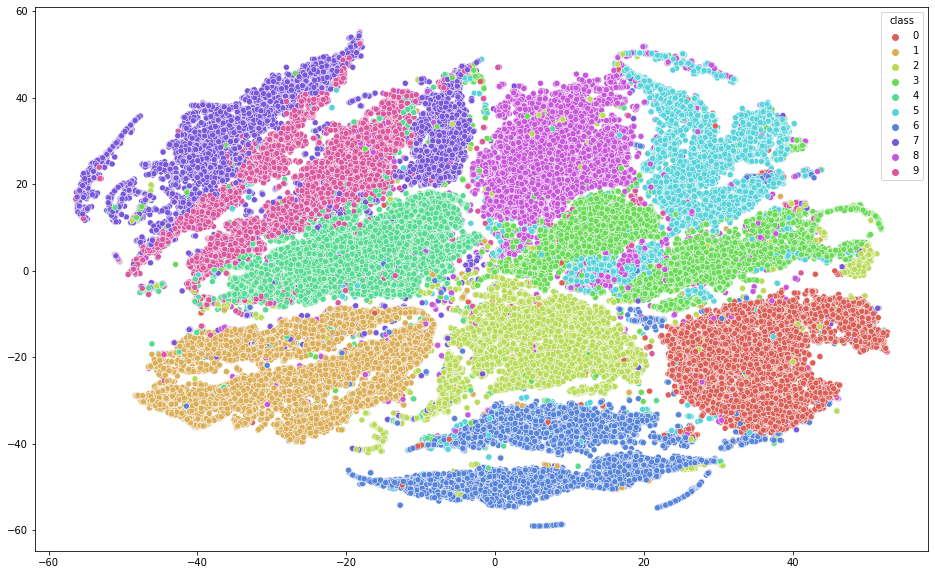

In [5]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = X_embedded[:,0], y = X_embedded[:,1], hue = y, palette = sns.hls_palette(10), legend = 'full');

In [6]:
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)

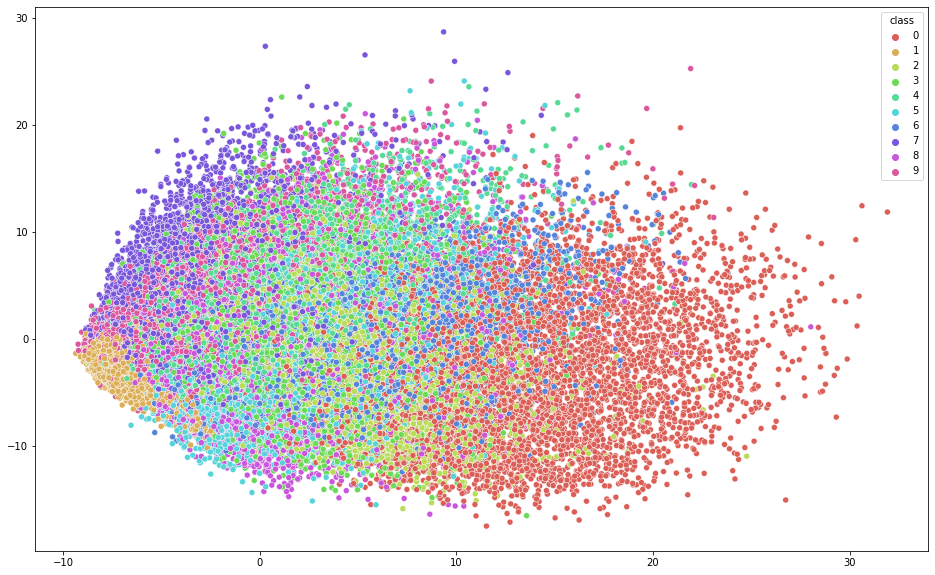

In [7]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = pca_X[:,0], y = pca_X[:,1], hue = y, palette = sns.hls_palette(10), legend = 'full')

(Optional, cộng điểm) tự implement thuật toán t-SNE để giảm chiều dữ liệu IRIS về 2 chiều.